## Sagnac Frequency - Backscatter Correction - Multi Day - Case 3

## Imports

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime, read, Trace, Stream
from scipy.signal import hilbert

from functions.get_fft import __get_fft
from functions.multitaper_psd import __multitaper_psd
from functions.welch_psd import __welch_psd
from andbro__read_sds import __read_sds
from andbro__readYaml import __readYaml

In [5]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [40]:
config = {}

config['ring'] = "U"

config['seed'] = "BW.DROMY..FJU"

config['path_to_sds'] = archive_path+"romy_archive/"

config['tbeg'] = UTCDateTime("2023-11-29 00:00")
config['tend'] = UTCDateTime("2023-12-14 00:00")

## path to Sagnac data
config['path_to_autodata'] = archive_path+f"romy_autodata/"

config['path_to_data'] = data_path+"sagnac_frequency/data/backscatter/"

config['path_to_figs'] = data_path+"sagnac_frequency/figures/"

## Configurations

In [41]:
def __load_backscatter_data(tbeg, tend, ring, path_to_data):

    from obspy import UTCDateTime
    from datetime import date
    from pandas import read_pickle, concat, DataFrame, date_range

    t1 = date.fromisoformat(str(UTCDateTime(tbeg).date))
    t2 = date.fromisoformat(str((UTCDateTime(tend)-86400).date))

    df = DataFrame()
    for dat in date_range(t1, t2):
        print(dat)
        dat_str = str(dat)[:10].replace("-","")
        file = f"FJ{ring}_{dat_str}_backscatter.pkl"

        if not os.path.isfile(path_to_data+file):
            _path = data_path+"sagnac_frequency/data/"

            out = DataFrame()
            for m in range(24):
                hour = str(m).rjust(2, '0')+":00:00"
                filename = f"FJU_{dat_str}_{hour}_backscatter.pkl"
                try:
                    _df = read_pickle(_path+filename)
                    out = concat([out, _df])
                except:
                    print(f" -> failed: {_path}{filename}")
                    continue

            if not out.empty:
                print(f" -> write to: {_path}backscatter/FJU_{dat_str}_backscatter.pkl")
                out.to_pickle(f"{_path}backscatter/FJU_{dat_str}_backscatter.pkl")
            else:
                continue

        try:
            df0 = read_pickle(path_to_data+file)
            df = concat([df, df0])
        except:
            print(f"error for {file}")

    df.reset_index(inplace=True)

    return df

In [42]:
bs = __load_backscatter_data(config['tbeg'], config['tend'], config['ring'], config['path_to_data'])

bs['time_sec'] = bs.time2 - bs.time1 + (bs.time1 - bs.time1.loc[0])

2023-11-29 00:00:00
2023-11-30 00:00:00
 -> failed: /home/andbro/kilauea-data/sagnac_frequency/data/FJU_20231130_00:00:00_backscatter.pkl
 -> failed: /home/andbro/kilauea-data/sagnac_frequency/data/FJU_20231130_01:00:00_backscatter.pkl
 -> failed: /home/andbro/kilauea-data/sagnac_frequency/data/FJU_20231130_02:00:00_backscatter.pkl
 -> failed: /home/andbro/kilauea-data/sagnac_frequency/data/FJU_20231130_03:00:00_backscatter.pkl
 -> failed: /home/andbro/kilauea-data/sagnac_frequency/data/FJU_20231130_04:00:00_backscatter.pkl
 -> failed: /home/andbro/kilauea-data/sagnac_frequency/data/FJU_20231130_05:00:00_backscatter.pkl
 -> failed: /home/andbro/kilauea-data/sagnac_frequency/data/FJU_20231130_06:00:00_backscatter.pkl
 -> failed: /home/andbro/kilauea-data/sagnac_frequency/data/FJU_20231130_07:00:00_backscatter.pkl
 -> failed: /home/andbro/kilauea-data/sagnac_frequency/data/FJU_20231130_08:00:00_backscatter.pkl
 -> failed: /home/andbro/kilauea-data/sagnac_frequency/data/FJU_20231130_09:00

In [44]:
bs

,index,time1,time2,fj_fs,fj_ac,fj_dc,fj_ph,f1_fs,f1_ac,f1_dc,f1_ph,f2_fs,f2_ac,f2_dc,f2_ph,w_s,time_sec
0,0,2023-11-29T15:00:00.000000Z,2023-11-29T15:01:00.000000Z,302.452139,0.251215,0.660399,-3.121810,302.452006,0.018455,2.613876,1.507947,302.448457,0.008223,2.935350,2.705307,302.450956,60.0
1,1,2023-11-29T15:01:00.000000Z,2023-11-29T15:02:00.000000Z,302.452469,0.246567,0.660772,-2.392770,302.453485,0.018120,2.614065,2.288088,302.450426,0.008104,2.935594,3.500754,302.451366,120.0
2,2,2023-11-29T15:02:00.000000Z,2023-11-29T15:03:00.000000Z,302.452377,0.239042,0.660946,-1.437603,302.453560,0.017557,2.614172,3.302742,302.451335,0.007906,2.935486,4.537041,302.451392,180.0
3,3,2023-11-29T15:03:00.000000Z,2023-11-29T15:04:00.000000Z,302.454484,0.230404,0.661151,-0.194124,302.452337,0.016940,2.614020,4.601078,302.451963,0.007659,2.935201,5.853432,302.453608,240.0
4,4,2023-11-29T15:04:00.000000Z,2023-11-29T15:05:00.000000Z,302.454980,0.259693,0.661284,0.045668,302.454002,0.016321,2.613841,6.130489,302.455159,0.007423,2.934939,7.397402,302.454195,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,55,2023-12-13T23:55:00.000000Z,2023-12-13T23:56:00.000000Z,302.451715,0.201907,0.695902,38.572326,302.450912,0.011745,2.468543,44.636478,302.450136,0.001339,2.960512,39.995907,302.451710,1241760.0
19256,56,2023-12-13T23:56:00.000000Z,2023-12-13T23:57:00.000000Z,302.451670,0.202465,0.695933,39.196896,302.451074,0.011805,2.468558,45.291873,302.435909,0.001194,2.960684,40.714011,302.451681,1241820.0
19257,57,2023-12-13T23:57:00.000000Z,2023-12-13T23:58:00.000000Z,302.451453,0.202891,0.695884,39.761783,302.449682,0.011826,2.468420,45.864314,302.437409,0.001135,2.960613,41.336903,302.451476,1241880.0
19258,58,2023-12-13T23:58:00.000000Z,2023-12-13T23:59:00.000000Z,302.451805,0.203039,0.695892,40.387207,302.452010,0.011811,2.468401,46.483546,302.424746,0.001137,2.960619,41.944122,302.451824,1241940.0


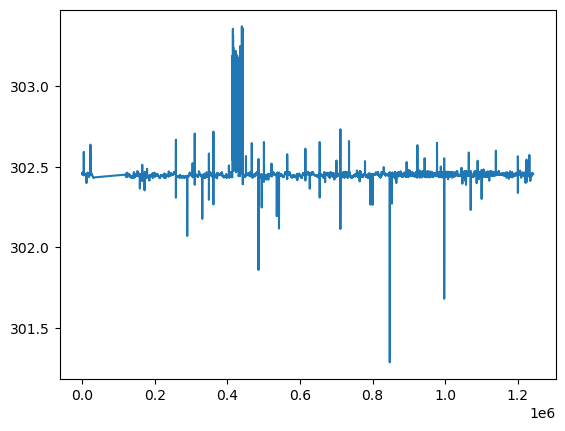

In [45]:
plt.plot(bs.time_sec, bs.fj_fs)

### Cut corrupt data periods

In [198]:
# times = [("2023-09-19 11:45", "2023-09-19 14:40"),
#          ("2023-09-19 15:50", "2023-09-19 16:00"),
#          ("2023-09-19 20:30", "2023-09-20 08:10"),
#          ("2023-09-20 09:50", "2023-09-20 12:00"),
#          ("2023-09-21 21:30", "2023-09-22 06:40"),
#          ("2023-09-22 11:30", "2023-09-22 12:30"),
#          ("2023-09-22 14:30", "2023-09-22 15:00"),
#         ]


# for t1, t2 in times:
#     bs['fj_fs'] = np.where((bs.time1 > t1) & (bs.time1 < t2), np.nan, bs.fj_fs)
#     bs['w_s'] = np.where((bs.time1 > t1) & (bs.time1 < t2), np.nan, bs.w_s)

### Compute PSD

In [19]:
from functions.multitaper_psd import __multitaper_psd

dat1 = np.array((bs.fj_fs - bs.fj_fs.mean()).replace(np.nan, 0))
dat2 = np.array((bs.w_s - bs.w_s.mean()).replace(np.nan, 0))

dat1 = dat1 - np.mean(dat1)
dat2 = dat2 - np.mean(dat2)

# f1, psd1 = __multitaper_psd(dat1, 60, n_win=10)
# f2, psd2 = __multitaper_psd(dat2, 60, n_win=10)

# f1, psd1 = __welch_psd(dat1, 60, twin_sec=86400)
# f2, psd2 = __welch_psd(dat2, 60, twin_sec=86400)

f1, psd1, pha1 = __get_fft(dat1, 60)
f2, psd2, pha2 = __get_fft(dat2, 60)


### Load and convert tilt

In [200]:
def __to_tilt(data):
    from numpy import pi, sqrt, arccos, deg2rad, arcsin
    return (arcsin((data * 632.8e-9 * 3) / ( (2*pi/86400) * 36/3 * sqrt(3) )) - deg2rad(48.162941))

In [201]:
def __conversion_to_tilt(st, conf):

    st0 = st.copy()

    def convertTemp(trace):
        Tvolt = trace.data * conf.get('gainTemp')
        coeff = conf.get('calcTempCoefficients')
        return coeff[0] + coeff[1]*Tvolt + coeff[2]*Tvolt**2 + coeff[3]*Tvolt**3

    def convertTilt(trace, conversion, sensitivity):
        return trace.data * conversion * sensitivity

    for tr in st0:
        if tr.stats.channel[-1] == 'T':
            tr.data = convertTemp(tr)
        elif tr.stats.channel[-1] == 'N':
            tr.data = convertTilt(tr, conf['convTN'], conf['gainTilt'])
        elif tr.stats.channel[-1] == 'E':
            tr.data = convertTilt(tr, conf['convTE'], conf['gainTilt'])
        else:
            print("no match")

    print(f"  -> converted data of {st[0].stats.station}")
    return st0

In [202]:
fs_tilt = __to_tilt(bs.w_s)

In [203]:
bromy = __read_sds(config['path_to_sds'], "BW.DROMY..LAT", config['tbeg']-600, config['tend']+600)
bromy += __read_sds(config['path_to_sds'], "BW.DROMY..LAN", config['tbeg']-600, config['tend']+600)

In [204]:
## tiltmeter configurations
confTilt = __readYaml(root_path+"Documents/ROMY/tiltmeter/", "tiltmeter.conf")

bromy = __conversion_to_tilt(bromy, confTilt['BROMY'])

bromy2 = bromy.copy()
bromy2= bromy2.decimate(6, no_filter=False)
bromy2= bromy2.decimate(10, no_filter=False)

temp_gradient = np.gradient(bromy2[0].data, 60)[10:-10]

bromy.trim(config['tbeg'], config['tend'])
bromy2.trim(config['tbeg'], config['tend'])

  -> converted data of DROMY


12 Trace(s) in Stream:
BW.DROMY..LAT | 2023-11-23T00:00:00.000000Z - 2023-11-23T12:13:00.000000Z | 60.0 s, 734 samples
BW.DROMY..LAT | 2023-11-23T12:19:41.000000Z - 2023-11-23T12:22:41.000000Z | 60.0 s, 4 samples
BW.DROMY..LAT | 2023-11-23T12:23:07.000000Z - 2023-11-23T12:58:07.000000Z | 60.0 s, 36 samples
BW.DROMY..LAT | 2023-11-23T14:28:46.000000Z - 2023-11-23T14:31:46.000000Z | 60.0 s, 4 samples
BW.DROMY..LAT | 2023-11-23T14:32:12.000000Z - 2023-11-23T15:19:12.000000Z | 60.0 s, 48 samples
BW.DROMY..LAT | 2023-11-23T15:24:48.000000Z - 2023-11-26T23:59:48.000000Z | 60.0 s, 4836 samples
BW.DROMY..LAN | 2023-11-23T00:00:00.000000Z - 2023-11-23T12:14:00.000000Z | 60.0 s, 735 samples
BW.DROMY..LAN | 2023-11-23T12:19:41.000000Z - 2023-11-23T12:22:41.000000Z | 60.0 s, 4 samples
BW.DROMY..LAN | 2023-11-23T12:23:07.000000Z - 2023-11-23T13:01:07.000000Z | 60.0 s, 39 samples
BW.DROMY..LAN | 2023-11-23T14:28:46.000000Z - 2023-11-23T14:31:46.000000Z | 60.0 s, 4 samples
BW.DROMY..LAN | 2023-11-23T

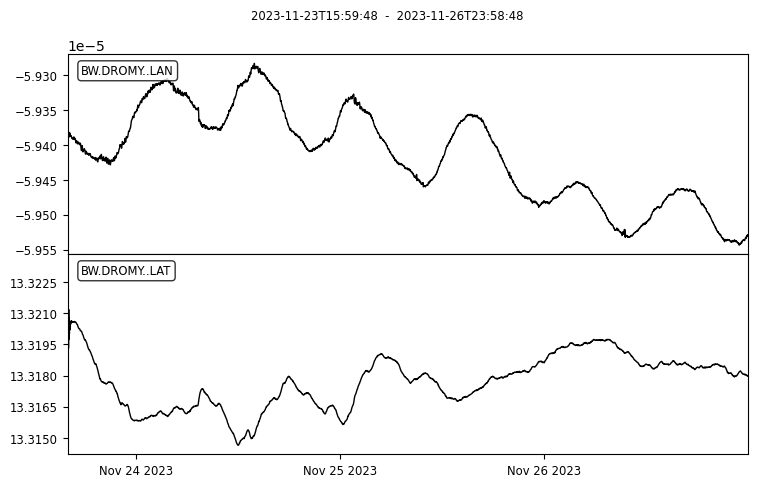

In [217]:
bromy2.trim(bs.time1[0], bs.time1[bs.time1.size-1])
bromy2.plot(equal_scale=False);


### Load WROMY data

In [206]:
from andbro__load_WROMY_stream import __load_wromy_stream

ws1 = __load_wromy_stream(config['path_to_sds'], "BW.WROMY..WS1", config['tbeg'], config['tend'])
ws5 = __load_wromy_stream(config['path_to_sds'], "BW.WROMY..WS5", config['tbeg'], config['tend'])
ws9 = __load_wromy_stream(config['path_to_sds'], "BW.WROMY..WS9", config['tbeg'], config['tend'])

Specified end: 2023-11-27T00:00:00.000000Z 
Trace end:     2023-11-26T23:59:59.000000Z
Specified end: 2023-11-27T00:00:00.000000Z 
Trace end:     2023-11-26T23:59:59.000000Z
Specified end: 2023-11-27T00:00:00.000000Z 
Trace end:     2023-11-26T23:59:59.000000Z


In [207]:
ws1 = ws1.decimate(6, no_filter=False)
ws1 = ws1.decimate(10, no_filter=False)

ws5 = ws5.decimate(6, no_filter=False)
ws5 = ws5.decimate(10, no_filter=False)

ws9 = ws9.decimate(6, no_filter=False)
ws9 = ws9.decimate(10, no_filter=False)

In [208]:
from functions.smoothing import __smooth

ws1_T = ws1.select(channel="*T")[0].data
ws1_T_smooth = __smooth(ws1_T, 60)
ws1_gradient = np.gradient(ws1_T_smooth, 5)

ws5_T = ws5.select(channel="*T")[0].data
ws5_T_smooth = __smooth(ws5_T, 60)
ws5_gradient = np.gradient(ws5_T_smooth, 5)

ws9_T = ws9.select(channel="*T")[0].data
ws9_T_smooth = __smooth(ws9_T, 60)
ws9_gradient = np.gradient(ws9_T_smooth, 5)

(-0.01, 0.01)

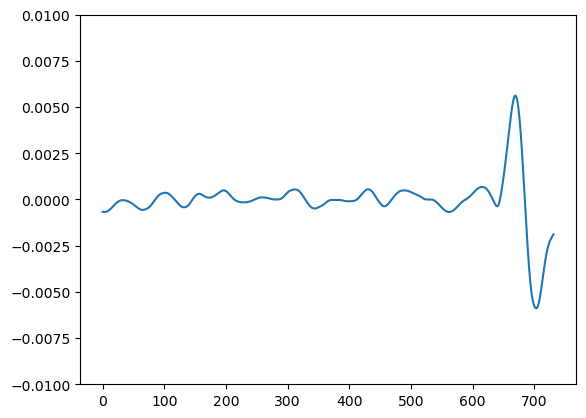

In [209]:
# plt.plot(ws1_gradient)
# plt.plot(ws5_gradient)
plt.plot(ws1_gradient-ws5_gradient)

plt.ylim(-0.01, 0.01)

## Plotting

### CWT

In [21]:
from functions.compute_cwt import __compute_cwt

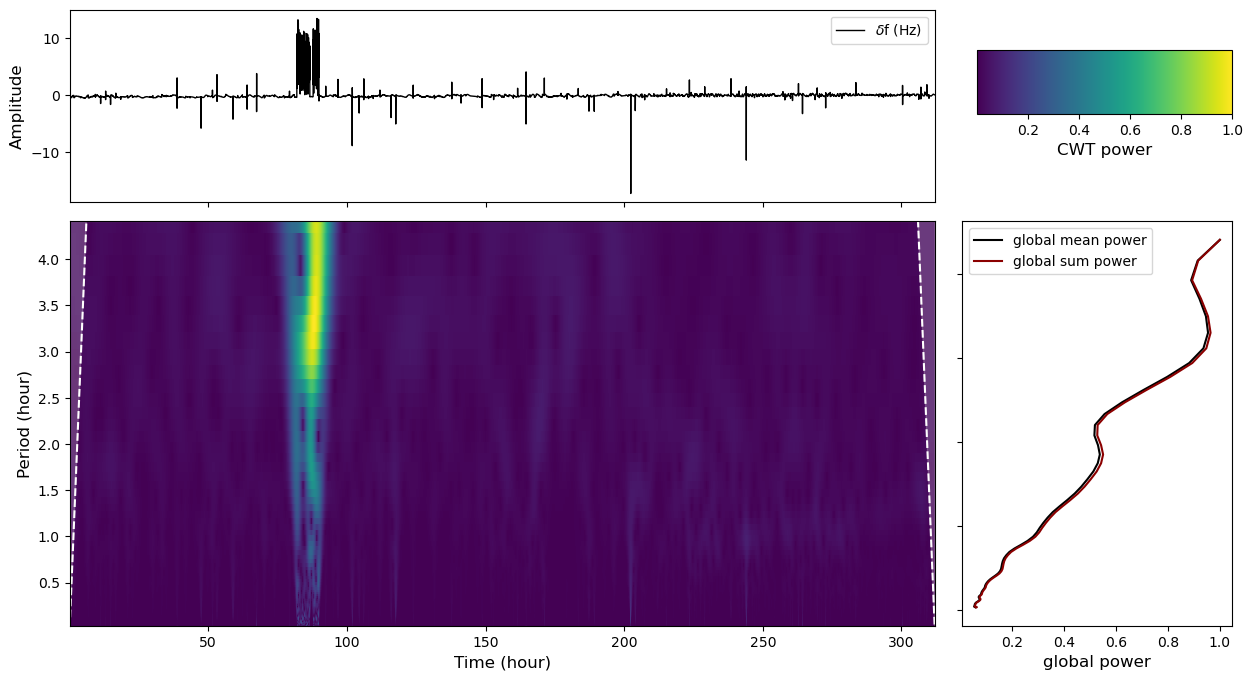

In [22]:
ttt = np.array(bs.time_sec)
arr = np.array(bs.w_s)
dt = 60 # seconds

out = __compute_cwt(ttt, arr, dt, tscale="hour", datalabel="$\delta$f (Hz)",
                    log=False, period=True, fmax=None, plot=True)

out['fig'].savefig(config['path_to_figs']+f"SagnacFrequency_BS_RU_multiday_Case2_CWT.png", format="png", dpi=200, bbox_inches='tight')


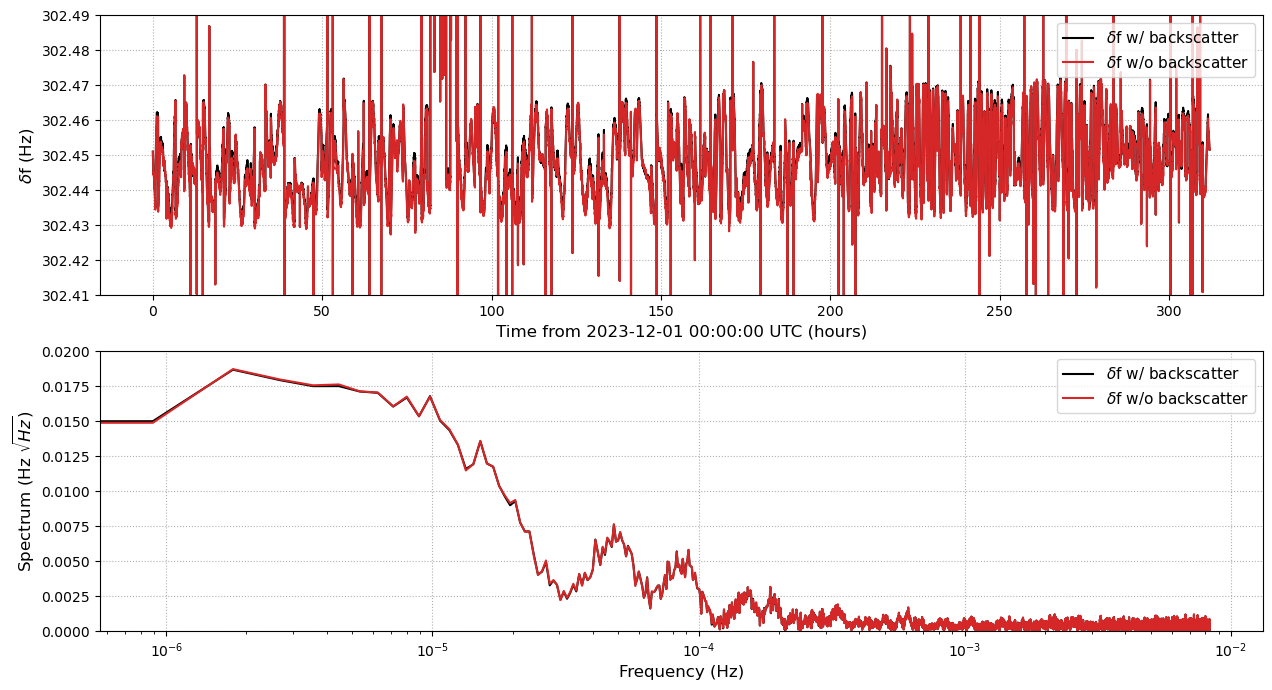

In [28]:
def __makeplot():

    Nrow, Ncol = 2, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8))

    ax[0].plot(bs.time_sec/3600, bs.fj_fs, color="black", label=f"$\delta$f w/ backscatter")
    ax[0].plot(bs.time_sec/3600, bs.w_s, color="tab:red", label=f"$\delta$f w/o backscatter")

    ax[0].ticklabel_format(useOffset=False)

    ax[1].semilogx(f1, psd1, color="black", label=f"$\delta$f w/ backscatter")
    ax[1].semilogx(f2, psd2, color="tab:red", label=f"$\delta$f w/o backscatter")

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        ax[_n].legend(loc=1, fontsize=font-1)

    ax[0].set_ylim(302.41, 302.49)
    ax[1].set_ylim(0, 0.02)

    ax[0].set_ylabel(f"$\delta$f (Hz)", fontsize=font)
    ax[0].set_xlabel(f"Time from {config['tbeg'].date} {config['tbeg'].time} UTC (hours)", fontsize=font)

    # ax[1].set_ylabel("PSD (Hz$^2$ /Hz)", fontsize=font)
    ax[1].set_ylabel("Spectrum (Hz $\sqrt{Hz}$)", fontsize=font)
    ax[1].set_xlabel("Frequency (Hz)", fontsize=font)

    # ax[1].axvline(1/(6*3600), ls="--", color="grey", zorder=0)
    # ax[1].axvline(1/(14*3600), ls="--", color="grey", zorder=0)

    plt.show();
    return fig

fig = __makeplot();

# fig.savefig(config['path_to_figs']+f"SagnacFrequency_BS_RU_multiday_Case2_PSD.png", format="png", dpi=200, bbox_inches='tight')


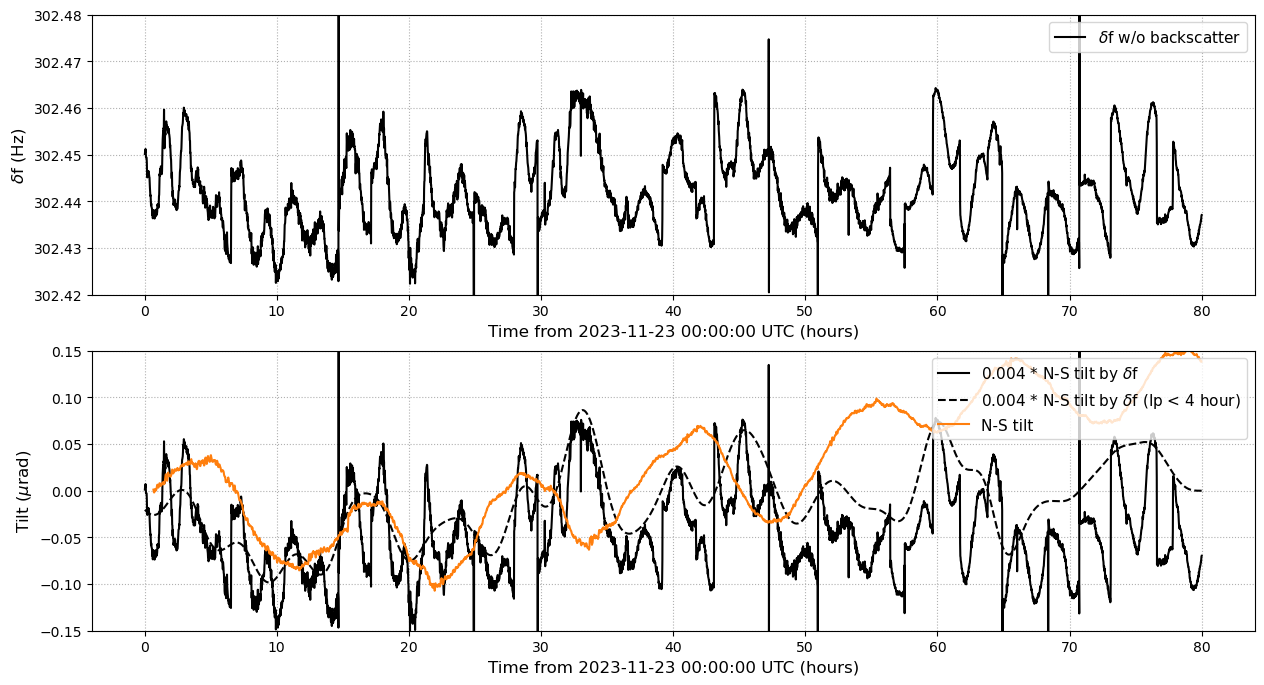

In [253]:
def __makeplot():

    # dat = np.array((fs_tilt-np.mean(fs_tilt[:10])))
    dat = np.array(fs_tilt)

    tr = Trace()
    tr.data = dat
    tr.stats.delta = 60
    tr.stats.starttime = bs.time1[0]

    tr.detrend("simple")
    # tr.taper(0.001)
    tr.filter("lowpass", freq=1/(4*3600), corners=4, zerophase=True)

    fs_tilt_lp = tr.data


    Nrow, Ncol = 2, 1

    font = 12

    tilt_scaling = 1e6

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8))

    # ax[0].plot(bs.time_sec/3600, bs.fj_fs, color="black", label=f"$\delta$f w/ backscatter")
    ax[0].plot(bs.time_sec/3600, bs.w_s, color="black", label=f"$\delta$f w/o backscatter")
    ax[0].set_ylim(302.42, 302.48)
    ax[0].ticklabel_format(useOffset=False)


    ax[1].plot(bs.time_sec/3600, (fs_tilt-np.mean(fs_tilt[:10]))*tilt_scaling*0.004, color="k", label=f"0.004 * N-S tilt by $\delta$f")
    ax[1].plot(bs.time_sec/3600, fs_tilt_lp*tilt_scaling*0.004, ls="--", color="k", label=f"0.004 * N-S tilt by $\delta$f (lp < 4 hour)")

    bromy_tilt = bromy2.select(channel="*N")[0].data
    ax[1].plot(bromy2.select(channel="*N")[0].times()[40:]/3600, -1*(bromy_tilt-np.mean(bromy_tilt[40:50]))[40:]*tilt_scaling, color="tab:orange", label=f"N-S tilt")
    # ax[1].set_ylim(-59.5, -59.25)
    ax[1].set_ylim(-0.15, 0.15)

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        ax[_n].legend(loc=1, fontsize=font-1)


    ax[0].set_ylabel(f"$\delta$f (Hz)", fontsize=font)
    ax[0].set_xlabel(f"Time from {config['tbeg'].date} {config['tbeg'].time} UTC (hours)", fontsize=font)

    ax[1].set_ylabel("Tilt ($\mu$rad)", fontsize=font)
    ax[1].set_xlabel(f"Time from {config['tbeg'].date} {config['tbeg'].time} UTC (hours)", fontsize=font)

    plt.show();
    return fig

fig = __makeplot();

# fig.savefig(config['path_to_figs']+f"SagnacFrequency_BS_RU_multiday_Case2_Tilt.png", format="png", dpi=200, bbox_inches='tight')


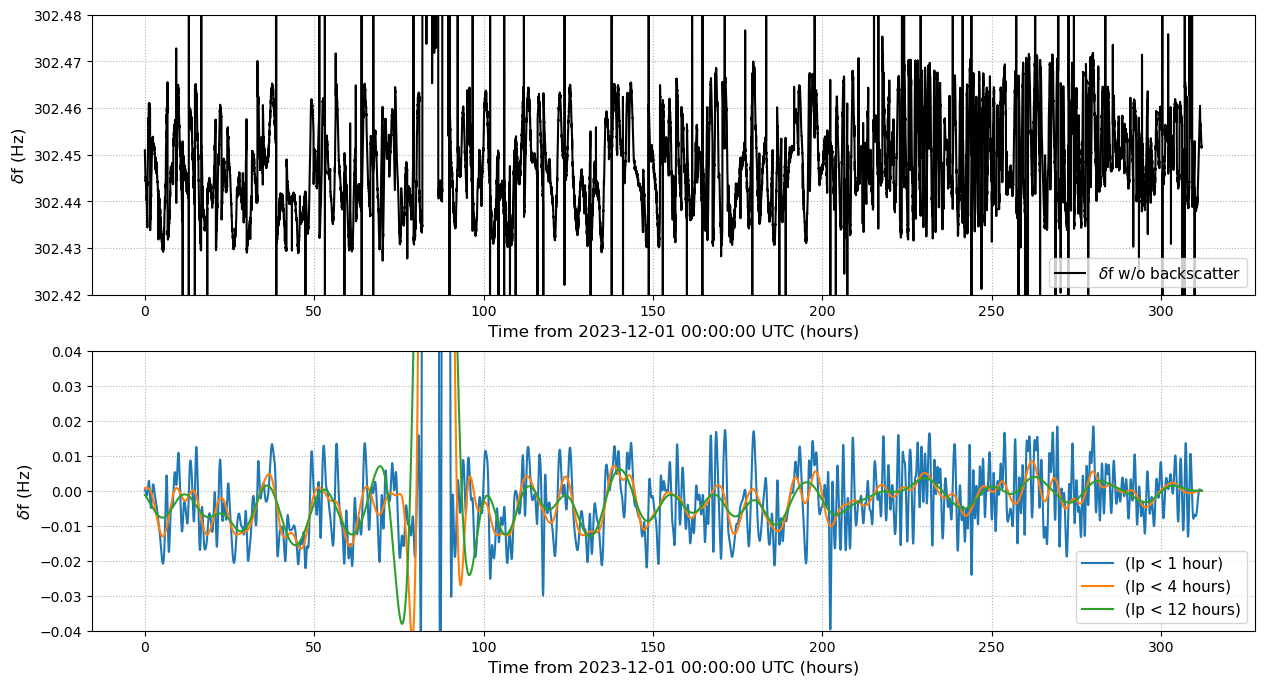

In [35]:
def __makeplot():

    dat = np.array(bs.w_s)

    tr = Trace()
    tr.data = dat
    tr.stats.delta = 60
    tr.stats.starttime = bs.time1[0]

    ## --------------------------------------------
    flower0, flower0_str = 1/(0.5*3600), "0.5 hour"
    tr0 = tr.copy()
    tr0.detrend("simple")
    tr0.taper(0.01)
    tr0.filter("highpass", freq=flower0, corners=4, zerophase=True)

    fs_tilt_lp0 = tr0.data

    ## --------------------------------------------
    flower1, flower1_str = 1/(1*3600), "1 hour"
    tr1 = tr.copy()
    tr1.detrend("simple")
    tr1.taper(0.01)
    tr1.filter("lowpass", freq=flower1, corners=4, zerophase=True)

    fs_tilt_lp1 = tr1.data

    ## --------------------------------------------
    flower2, flower2_str = 1/(6*3600), "4 hours"
    tr2 = tr.copy()
    tr2.detrend("simple")
    tr2.taper(0.01)
    tr2.filter("lowpass", freq=flower2, corners=4, zerophase=True)

    fs_tilt_lp2 = tr2.data

    ## --------------------------------------------
    flower3, flower3_str = 1/(12*3600), "12 hours"
    tr3 = tr.copy()
    tr3.detrend("simple")
    tr3.taper(0.01)
    tr3.filter("lowpass", freq=flower3, corners=4, zerophase=True)

    fs_tilt_lp3 = tr3.data


    ## --------------------------------------------

    Nrow, Ncol = 2, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8))

    # ax[0].plot(bs.time_sec/3600, bs.fj_fs, color="black", label=f"$\delta$f w/ backscatter")
    ax[0].plot(bs.time_sec/3600, bs.w_s, color="black", label=f"$\delta$f w/o backscatter")
    ax[0].set_ylim(302.42, 302.48)
    ax[0].ticklabel_format(useOffset=False)


    # ax[1].plot(bs.time_sec/3600, fs_tilt_lp0, ls="-", label=f"(hp > {flower0_str})")
    ax[1].plot(bs.time_sec/3600, fs_tilt_lp1, ls="-", label=f"(lp < {flower1_str})")
    ax[1].plot(bs.time_sec/3600, fs_tilt_lp2, ls="-", label=f"(lp < {flower2_str})")
    ax[1].plot(bs.time_sec/3600, fs_tilt_lp3, ls="-", label=f"(lp < {flower3_str})")


    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        ax[_n].legend(loc=4, fontsize=font-1)


    ax[0].set_ylabel(f"$\delta$f (Hz)", fontsize=font)
    ax[0].set_xlabel(f"Time from {config['tbeg'].date} {config['tbeg'].time} UTC (hours)", fontsize=font)

    ax[1].set_ylabel(f"$\delta$f (Hz)", fontsize=font)
    ax[1].set_xlabel(f"Time from {config['tbeg'].date} {config['tbeg'].time} UTC (hours)", fontsize=font)

    ax[1].set_ylim(-0.04, 0.04)

    plt.show();
    return fig


fig = __makeplot();

# fig.savefig(config['path_to_figs']+f"SagnacFrequency_BS_RU_multiday_Case2_Tilt.png", format="png", dpi=200, bbox_inches='tight')


## Testing

2.1367521367521368e-05 2.777777777777778e-05


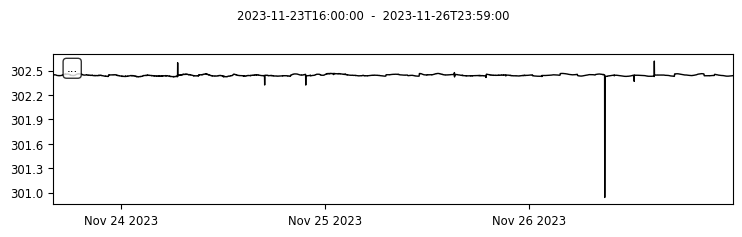

... | 2023-11-23T16:00:00.000000Z - 2023-11-26T23:59:00.000000Z | 60.0 s, 4800 samples


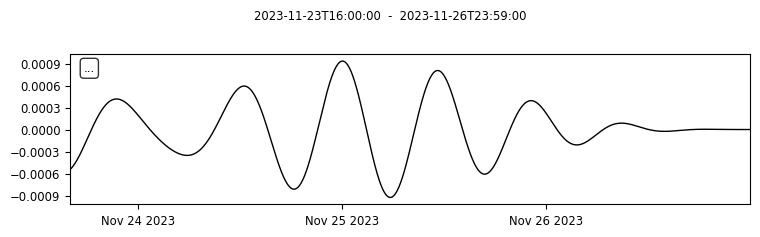

In [275]:
dat = np.array(bs.w_s)

f1 = 1/(13*3600)
f2 = 1/(10*3600)

# f1 = 1/(25*3600)
# f2 = 1/(22*3600)

print(f1, f2)

tr = Trace()
tr.data = dat
tr.stats.delta = 60
tr.stats.starttime = bs.time1[0]
tr.plot();
print(tr)

tr.detrend("simple")
tr.taper(0.001)
# tr.filter("lowpass", freq=0.0005, corners=4, zerophase=True)
tr.filter("bandpass", freqmin=f1, freqmax=f2, corners=4, zerophase=True)
tr.plot();

fs_tilt_lp = tr.data

NameError: name 'bromy2' is not defined

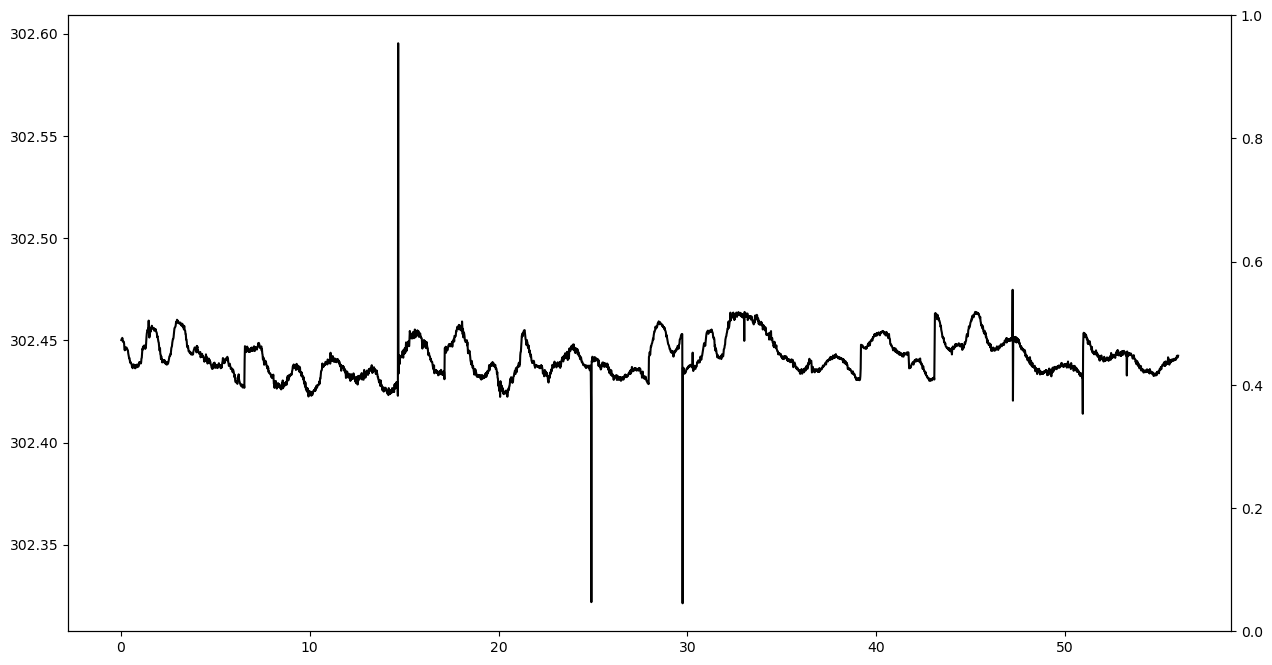

In [63]:
def __makeplot():

    Nrow, Ncol = 1, 1

    font = 14

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8))

    ax.plot(bs.time_sec/3600, bs.w_s, color="black", zorder=4, label=f"$\delta$f w/o backscatter")

    ax.ticklabel_format(useOffset=False)

    ax00 = ax.twinx()

    p2, = ax00.plot(bromy2[0].times()/3600, bromy2[0].data, color="tab:blue", label=f"", zorder=2)
    ax00.set_ylim(13.31, 13.325)

    # p2, = ax00.plot(bromy2[0].times()/3600, temp_gradient, color="tab:blue", label=f"", zorder=2)
    # ax00.set_ylim(-0.001, 0.001)

    # p2, = ax00.plot(ws1.select(channel="*T")[0].times()/3600, ws1_gradient, color="tab:blue", label=f"", zorder=2)
    # ax00.set_ylim(-0.01, 0.01)

    ax00.set_ylabel("Temperature Change (°C/s)", fontsize=font, color=p2.get_color())
    ax00.tick_params(axis='y', colors=p2.get_color())

    ax.grid(ls=":", zorder=1)
    ax.legend(loc=1, fontsize=font-1)

    # ax.set_ylim(302.97, 303.07)


    # ax.set_xlim(0, 108)
    # ax.set_xlim(30, 70)

    ax.set_ylabel(f"$\delta$f (Hz)", fontsize=font)
    ax.set_xlabel(f"Time from {config['tbeg'].date} {config['tbeg'].time} UTC (hours)", fontsize=font)

    plt.show();
    return fig

fig = __makeplot();

# fig.savefig(config['path_to_figs']+f"SagnacFrequency_BS_RU_multiday_TemperatureChange_zoomin.png", format="png", dpi=200, bbox_inches='tight')
